In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
df=pd.read_csv(os.path.join('neo_v2.csv'))
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [5]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [6]:
df['sentry_object'].unique()

array([False])

In [7]:
df['hazardous'].unique()

array([False,  True])

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.drop('name',axis=1,inplace=True)

In [10]:
df.drop('orbiting_body',axis=1,inplace=True)
df.drop('sentry_object',axis=1,inplace=True)

In [11]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


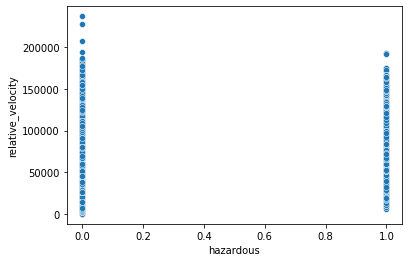

In [12]:
res = sns.scatterplot(x="hazardous", y="relative_velocity", data=df)
plt.show()

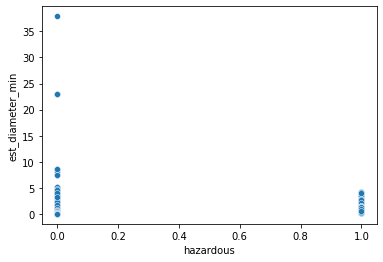

In [13]:
res = sns.scatterplot(x="hazardous", y="est_diameter_min", data=df)
plt.show()

In [14]:
from fast_ml.model_development import train_valid_test_split

In [15]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'hazardous', 
                                                                            train_size=0.7, valid_size=0.1, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
model=LogisticRegression()
hist=model.fit(X_train,y_train)

In [18]:
y_pred=model.predict(X_valid)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.9024551359682924


In [27]:
y_hat=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.9023007485689124
